#### Time Series analysis :

• Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

• Time series forecasting is the use of a model to predict future values based on previously observed values.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

• Here we are using furniture sales data 

In [2]:
#read the csv file 
sales_df=pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',index_col='Order Date',parse_dates=True)

In [3]:
sales_df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
sales_df=sales_df.resample('m').mean() # here converting into monthly 
sales_df.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,4381.974684,54965.784810,180.213861,3.594937,0.126582,31.015072
2014-02-28,5918.152174,66299.456522,98.258522,3.456522,0.176087,18.745835
2014-03-31,5551.433121,52958.840764,354.719803,3.726115,0.167516,3.176624
2014-04-30,5115.740741,57213.533333,209.595148,3.970370,0.110000,25.843224
2014-05-31,5014.000000,53260.688525,193.838418,3.819672,0.155328,22.448439


In [5]:
#check info about dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-31 to 2017-12-31
Freq: M
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       48 non-null     float64
 1   Postal Code  48 non-null     float64
 2   Sales        48 non-null     float64
 3   Quantity     48 non-null     float64
 4   Discount     48 non-null     float64
 5   Profit       48 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB


In [6]:
#check the datatypes
sales_df.dtypes

Row ID         float64
Postal Code    float64
Sales          float64
Quantity       float64
Discount       float64
Profit         float64
dtype: object

In [7]:
#data description 
sales_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,5010.018663,55034.469092,228.113199,3.778795,0.156323,27.914517
std,409.517548,4639.864342,48.044839,0.168511,0.021057,20.459447
min,3642.918519,44478.096386,98.258522,3.392523,0.096386,-56.569086
25%,4809.123670,52306.298396,193.236467,3.701550,0.140753,21.543199
50%,5014.619898,55072.297634,215.439438,3.785572,0.158537,26.190436
75%,5223.307700,57269.678481,256.709219,3.889288,0.171939,33.952961
max,5918.152174,66299.456522,354.719803,4.068966,0.194433,82.873176


In [8]:
#check the null values present in dataset
sales_df.isnull().sum()

Row ID         0
Postal Code    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

* Hence there are no null values present

<AxesSubplot:xlabel='Order Date'>

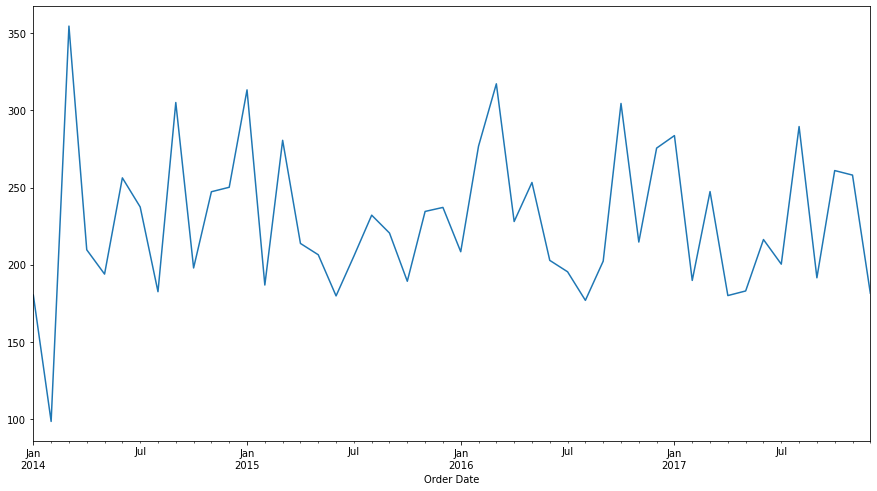

In [9]:
plt.figure(figsize=(15,8))
sales=sales_df['Sales']
sales.plot()

The graph indicates that the time series has seasonality .

#### Decomposition

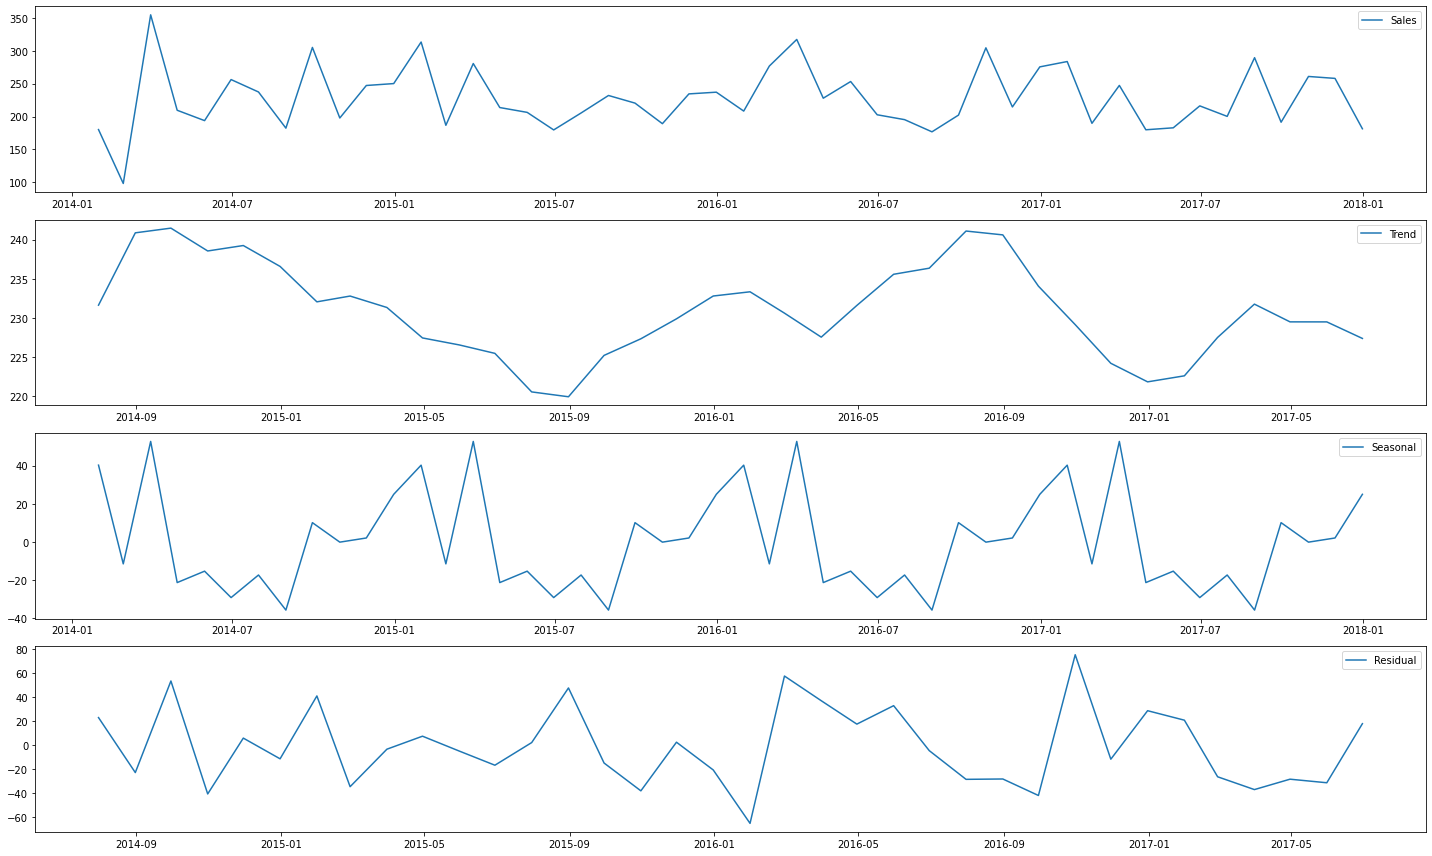

In [10]:
# different components of the Time series data

# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

#decomposition=seasonal_decompose(closeprice, period=12)
decomposition=seasonal_decompose(sales, period=12)
sales_trend=decomposition.trend
sales_seasonal=decomposition.seasonal
sales_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales,label='Sales')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(sales_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(sales_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(sales_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

### check data for seasonality 

In [11]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    

    if pvalue < 0.05:
        msg = "p-value={} Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "p-value={} Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [12]:
# function call
checkStationarity(sales)

'p-value=0.0154897201910976 Data is Stationary. Proceed to model building'

#### Plot ACF AND PACF 

In [13]:
#Split data into training and test parts
ratio=0.7
m1=int(len(sales)*ratio)
train=sales[:m1]
test=sales[m1:]

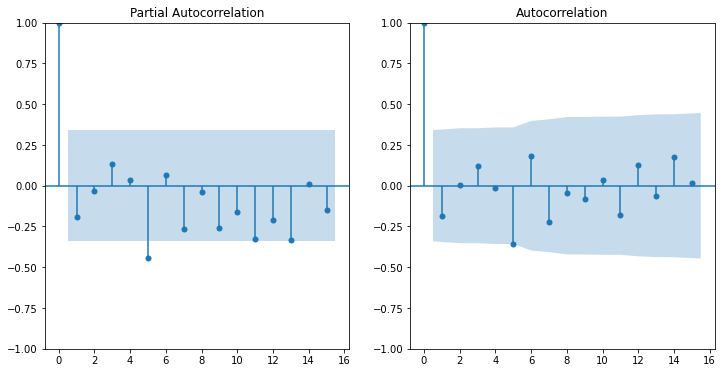

In [14]:
_,ax=plt.subplots(1,2,figsize=(12,6))

plot_pacf(train,lags=15,ax=ax[0]);
plot_acf(train,lags=15,ax=ax[1]);

* Interpretation :
    
    in partial autocorelation : p=5
    
    in autocorelation : q=5

#### DEFINE FUNC TO BUILD ARMA MODEL and predict the sales figure of test data 


* Build ARMA MODEL
* SUMMARIZE THE MODEL

In [15]:
p=[0,1,2,3]
q=[0,1]

p1=[]
q1=[]
aic1=[]
rmse1=[]

def modelcheck(p,q):
    p1.append(p)
    q1.append(q)
    model=ARIMA(train,order=(p,0,q)).fit()
    aic=model.aic
    aic1.append(aic)
    fcast=model.forecast(len(test))
    actual=[]; pred=[]
    for i in range(len(fcast)):
        actual.append(test[i])
        pred.append(fcast[i])
    df=pd.DataFrame({'actual':actual,'predicted':pred})
    rmse=mean_squared_error(df.actual,df.predicted,squared=False)
    rmse1.append(rmse)
    

In [16]:
for i in p:
    for j in q:
        modelcheck(i,j)
df_value=pd.DataFrame({"p":p1,"q":q1,"aic":aic1,"RMSE":rmse1})
df_value.sort_values('RMSE')

,p,q,aic,RMSE
3,1,1,354.804869,40.798731
5,2,1,359.719440,42.030077
4,2,0,357.848591,42.169814
1,0,1,355.928735,42.343593
2,1,0,355.955471,42.601081
6,3,0,358.886294,43.154931
0,0,0,355.089551,43.193620
7,3,1,360.878581,43.248268


#### Here lowest value of rmse and AIC at p=5 and q=5 since its lower the AIC and RMSE better the model

* Rebuilding model using optimum p and q values

In [44]:
model_arima=ARIMA(train,order=(5,0,5)).fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -165.975
Date:                Tue, 15 Nov 2022   AIC                            355.950
Time:                        10:06:41   BIC                            373.908
Sample:                    01-31-2014   HQIC                           361.992
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.6566      1.836    125.081      0.000     226.058     233.255
ar.L1         -0.3266      0.249     -1.312      0.190      -0.815       0.161
ar.L2          0.5859      0.351      1.669      0.095      -0.102       1.274
ar.L3          0.7187      0.206      3.490      0.000       0.315       1.122
ar.L4         -0.0443      0.179     -0.248      0.804      -0.394       0.306
ar.L5         -0.7926      0.197     -4.029      0.000      -1.178      -0.407
ma.L1          0.1169      9.875      0.012      0.991     -19.237      19.471
ma.L2         -1.1155     10.292     -0.108      0.914     -21.287      19.056
ma.L3         -1.1551      5.476     -0.211      0.833     -11.888       9.578
ma.L4          0.3672     10.821      0.034      0.973     -20.842      21.576
ma.L5          0.8141      7.565      0.108      0.914     -14.014      15.642
sigma2       868.1921   8286.838      0.105      0.917   -1.54e+04    1.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.64   Prob(JB):                         0.45
Heteroskedasticity (H):               0.53   Skew:                             0.16
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
fcast1=model_arima.fittedvalues

In [46]:
df_1=pd.DataFrame({'actual':sales, 'forecast':fcast1})
len(df_1)

48

In [20]:
A= df_1.iloc[0:30]

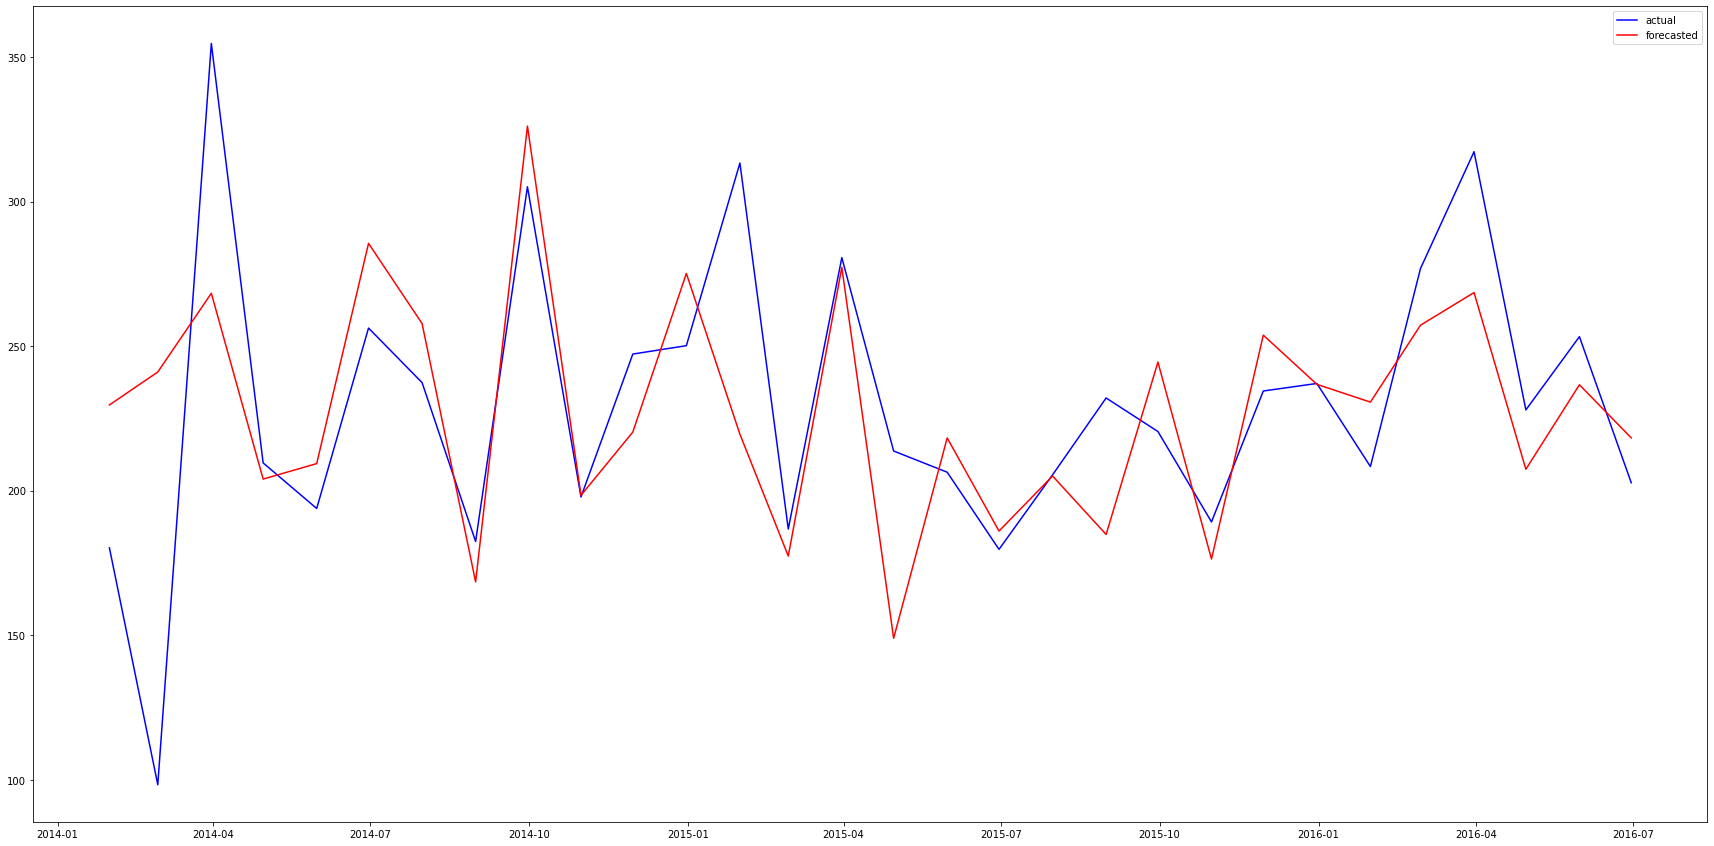

In [21]:
plt.figure(figsize=(30,15))
plt.plot(A['actual'], c='blue', label='actual')
plt.plot(A['forecast'], c='red', label='forecasted')
plt.legend()
plt.show()

In [22]:
mse1 = mean_squared_error(A.actual , A.forecast)
mse1

1822.1456949104577

In [23]:
aic1=model_arima.aic
aic1

355.94963564627307

In [24]:
bic1=model_arima.bic
bic1

373.90772638387085

In [25]:
rmse1=mean_squared_error(A.actual, A.forecast, squared=False)
rmse1

42.68659853994527

###  Build the SARIMA MODEL


* PREDICT THE SALES FIG USING TEST DATA AND FORECAST USING MODEL

In [26]:
sales_comp=seasonal_decompose(sales,period=12)
sales_seasonal=sales_comp.seasonal

In [27]:
checkStationarity(sales_seasonal)

'p-value=0.0 Data is Stationary. Proceed to model building'

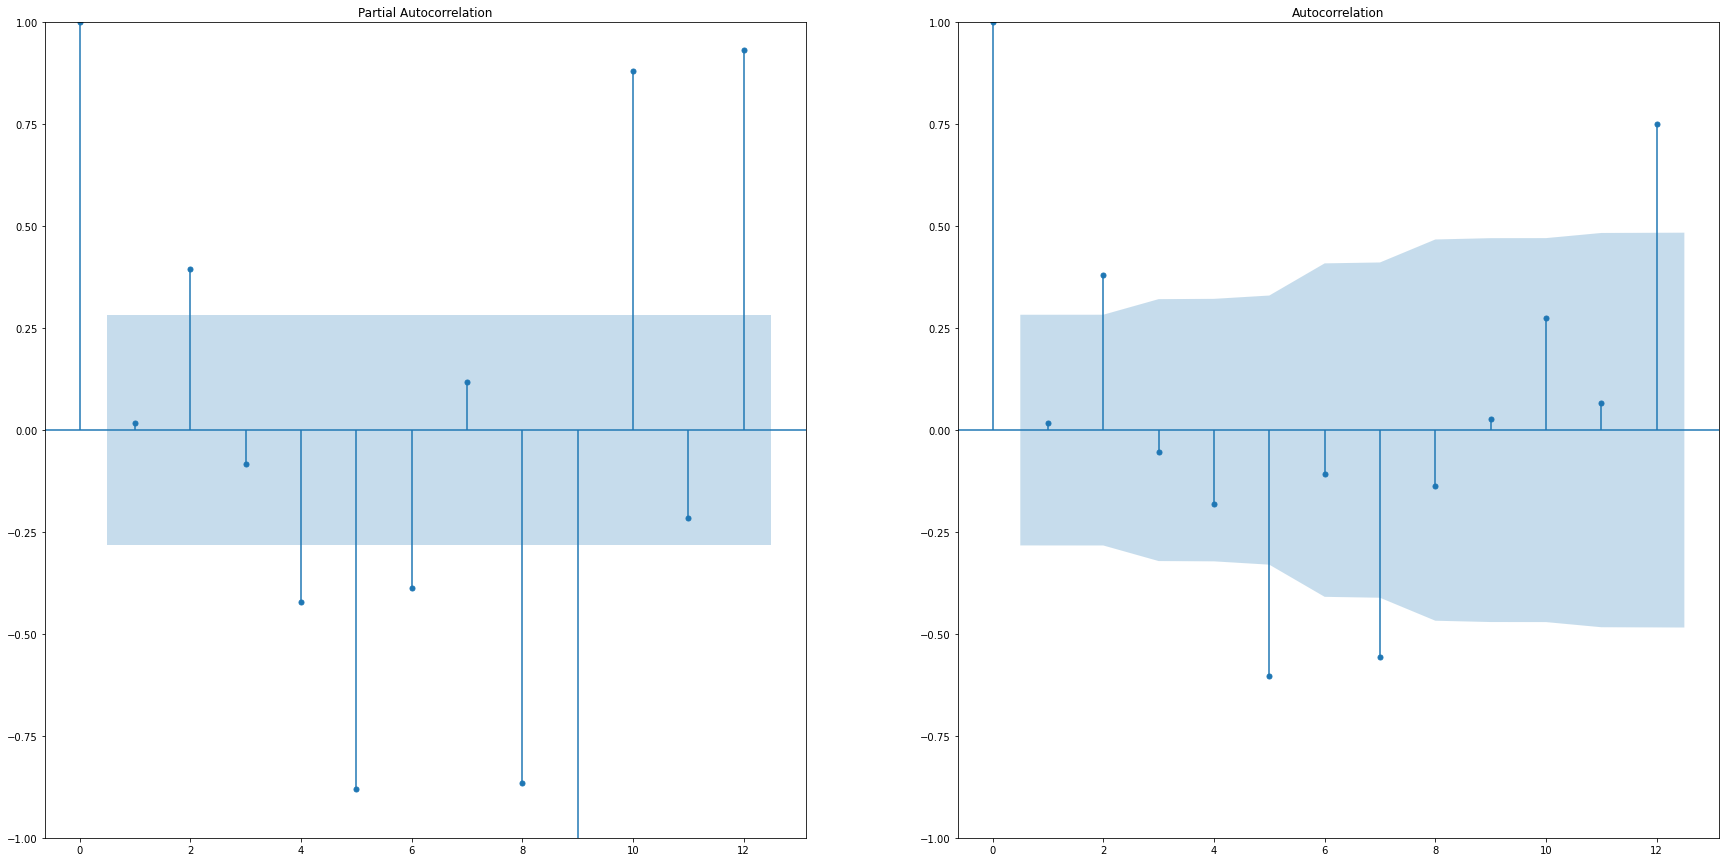

In [47]:
_,ax=plt.subplots(1,2,figsize=(30,15))

plot_pacf(sales_seasonal,lags=12,ax=ax[0]);
plot_acf(sales_seasonal,lags=12,ax=ax[1]);

#### p=2 , q=0 lowerst the rmse and AIC values 

In [29]:
p=2;q=0;d=0
P=2;Q=0;D=0
model2=sm.tsa.statespace.SARIMAX(sales,oder=(p,d,q),seasonal_order=(P,D,Q,12)).fit()

In [30]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -272.695
Date:                            Tue, 15 Nov 2022   AIC                            553.389
Time:                                    10:03:11   BIC                            560.874
Sample:                                01-31-2014   HQIC                           556.218
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8696      0.082     10.564      0.000       0.708       1.031
ar.S.L12       0.3109      0.224      1.388      0.165      -0.128       0.750
ar.S.L24       0.2474      0.246      1.005      0.315      -0.235       0.730
sigma2      4508.8443    924.887      4.875      0.000    2696.099    6321.589
===================================================================================
Ljung-Box (L1) (Q):                  16.16   Jarque-Bera (JB):                 7.56
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.64   Skew:                             0.78
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Prediction using model

In [31]:
fcast_sarima = model2.forecast(len(test))

In [32]:
df_sarima= pd.DataFrame({'actual':sales,'forecast':fcast_sarima})
df_sarima.head()

,actual,forecast
2014-01-31,180.213861,NaN
2014-02-28,98.258522,NaN
2014-03-31,354.719803,NaN
2014-04-30,209.595148,NaN
2014-05-31,193.838418,NaN


In [33]:
fcast_sari=model2.fittedvalues

In [34]:
df_sari= pd.DataFrame({'actual':sales,'forecast':fcast_sari})
df_sari.head()

,actual,forecast
Order Date,,
2014-01-31,180.213861,0.000000
2014-02-28,98.258522,160.631533
2014-03-31,354.719803,90.121824
2014-04-30,209.595148,312.898028
2014-05-31,193.838418,187.855728


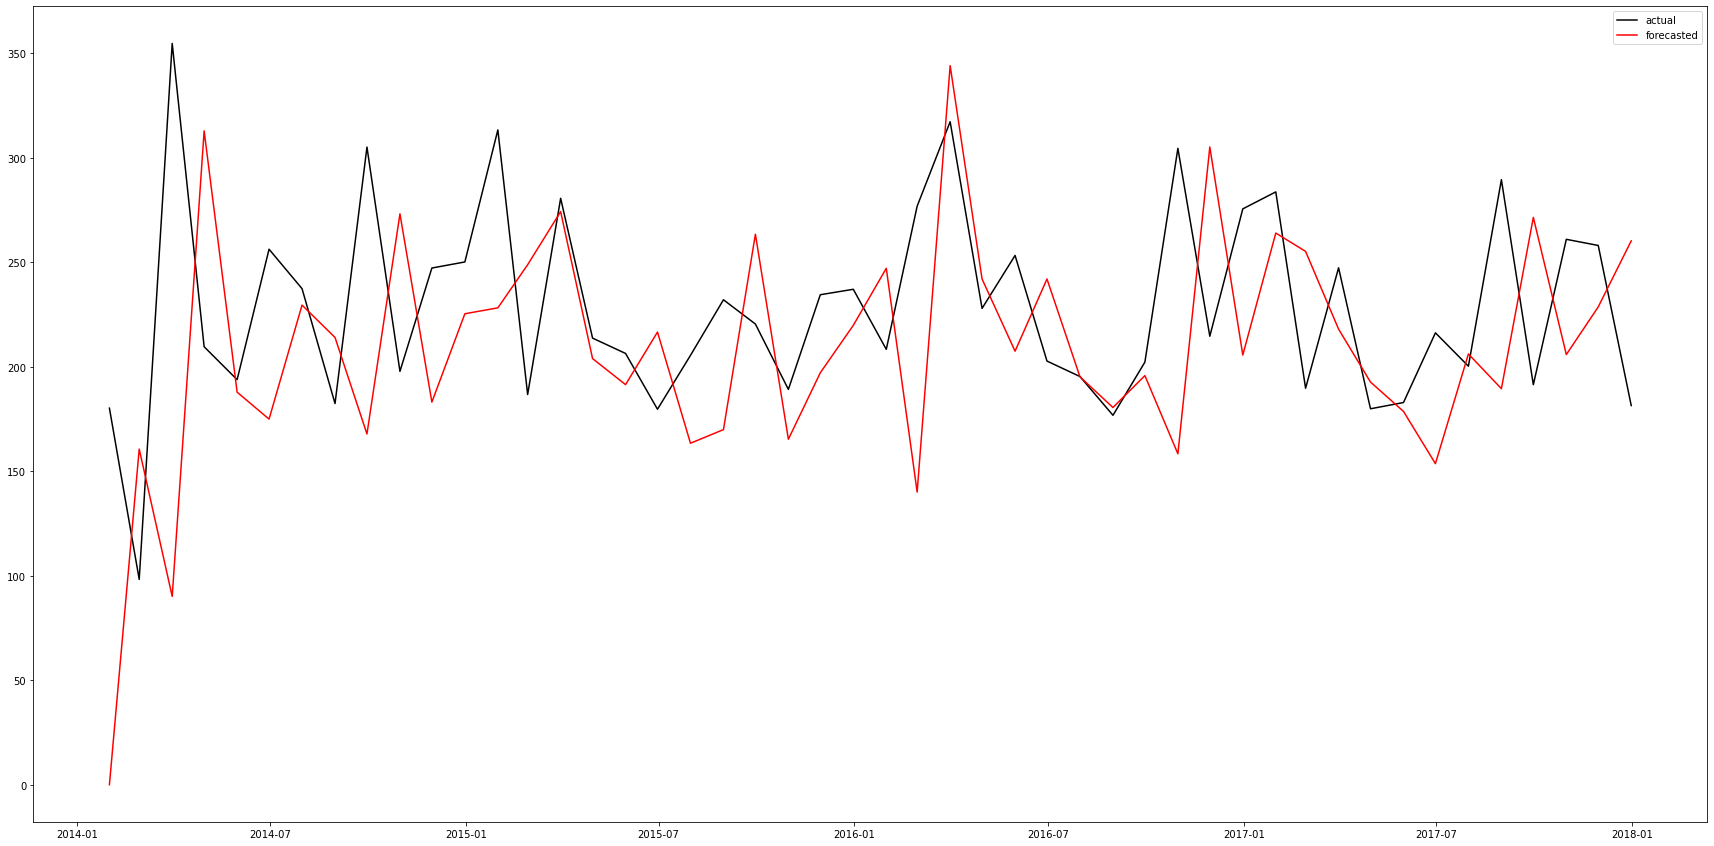

In [35]:
plt.figure(figsize=(30,15))
plt.plot(df_sari['actual'], c='black', label='actual')
plt.plot(df_sari['forecast'], c='red', label='forecasted')
plt.legend()
plt.show()

In [36]:
mse2 = mean_squared_error(sales , fcast_sari)
mse2

5668.118816121653

In [37]:
aic2=model2.aic
aic2

553.3893949140054

In [38]:
bic2=model2.bic
bic2

560.874198957637

In [39]:
rmse2=mean_squared_error(sales, fcast_sari, squared=False)
rmse2

75.28690999185484

### Model Comparision

In [40]:
results=list()
names=list()
results.append(rmse1)
names.append('Arma_rmse')
results.append(rmse2)
names.append('Sarima_rmse')
results.append(aic1)
names.append('Arma_Aic')
results.append(aic2)
names.append('Sarima_Aic')
results.append(bic1)
names.append('Arma_Bic')
results.append(bic2)
names.append('Sarima_Bic')


In [41]:
results

[42.68659853994527,
 75.28690999185484,
 355.94963564627307,
 553.3893949140054,
 373.90772638387085,
 560.874198957637]

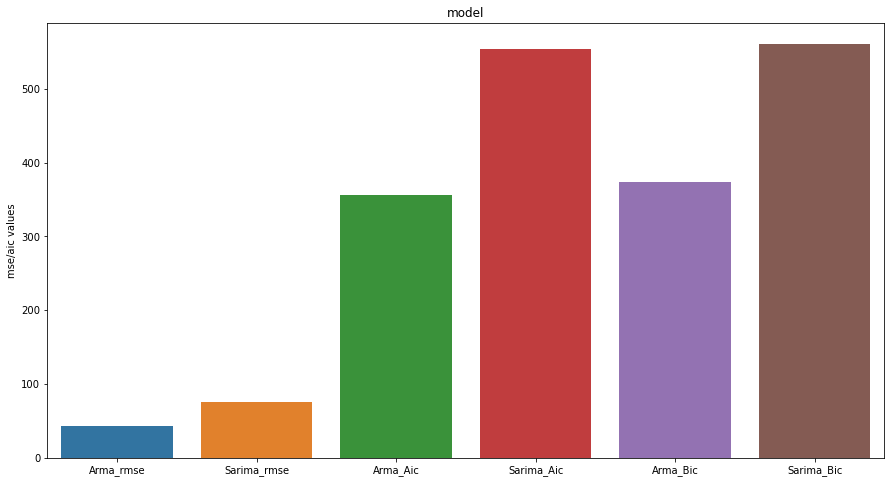

In [42]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(names,results);
plt.ylabel('mse/aic values')
plt.title('model');

In [48]:
from tabulate import tabulate

data=[['ARIMA',mse1,rmse1,aic1,bic1],
     ['SARIMA',mse2,rmse2,aic2,bic2]]
head=['Model','MSE','RMSE','AIC','BIC']
print(tabulate(data, headers=head, tablefmt='grid'))

+---------+---------+---------+---------+---------+
| Model   |     MSE |    RMSE |     AIC |     BIC |
+=========+=========+=========+=========+=========+
| ARIMA   | 1822.15 | 42.6866 | 355.95  | 373.908 |
+---------+---------+---------+---------+---------+
| SARIMA  | 5668.12 | 75.2869 | 553.389 | 560.874 |
+---------+---------+---------+---------+---------+


#### Interpretation :Here from analysis we can say that ARIMA model performed well compare to other by getting lower results for MSE,RMSE,AIC,BIc then SARIMA